### 1. Import netNMFsc and initialize an operator using either netNMFGD or netNMFMU

In [1]:
import netNMFsc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

dimensions = 5
n_inits = 3
max_iters = 100000
n_jobs = 1
# Gradient descent operator (generally performs significantly faster than multiplicative update)
operator = netNMFsc.netNMFGD(d=dimensions, n_inits=n_inits, max_iter=max_iters, n_jobs=n_jobs)
# alternatively can use multiplicative update operator:
# operator = netNMFMU(d=dimensions, alpha=alpha, n_inits=n_inits, tol=tol, max_iter=max_iters, n_jobs=n_jobs)

netNMFMU imported
netNMFGD imported


### 1. Import gene expression matrix and gene names

If expression data is from 10X genomics and is contained in a folder containing matrix.mtx,barcodes.tsv, and genes.tsv or a hdf5 file, data can be loaded automatically using:

In [ ]:
# if data is in .hdf5 format genome indicates the reference genome (typically 'mm10' or 'hg19')
genome=None
# if data is in .hdf5 format then teXdir is the .hdf5 file. If not then it is 
# the folder containing matrix.mtx and genes.tsv
tenXdir=None
operator.load_10X(direc=tenXdir,genome=genome)

If not, data can be loaded into a numpy array using your favorite method based on the file format of your data. For example, if your data is saved as numpy arrays:

In [2]:
X = np.load('netNMFsc/data/test_expression_matrix.npy')
genes = np.load('netNMFsc/data/test_genes.npy')
operator.X = X
operator.genes = genes
print('expression matrix shape is:',X.shape, 'number of genes is:',len(genes))
print(genes[0:10],'gene names are in gene symbol format')

expression matrix shape is: (100, 90) number of genes is: 100
['znf507' 'rassf4' 'farp2' 'myoz2' 'c8orf58' 'guca1b' 'page5' 'adar'
 'acss3' 'tinf2'] gene names are in gene symbol format


This dataset contains 3 clusters of cells and over 90% of the values in the data are dropped out (zero)

### 2. Load network and network gene names

If your network and network gene names are stored as numpy arrays they can be loaded as automatically operator.load_network. Networks from Coexpedia and Coexpressdb are included in the data folder and can be loaded using operator.load_network.

In [3]:
network_file_name = 'netNMFsc/data/test_network.npy'
netgenes_file_name = 'netNMFsc/data/test_netgenes.npy'
operator.load_network(net=network_file_name,genenames=netgenes_file_name)
print('network shape is:',operator.N.shape, 'and number of genes is:',len(operator.netgenes))
print(operator.netgenes[0:10],'gene names are in gene entrez id format')

2700 edges in network
network shape is: (100, 100) and number of genes is: 100
['22847' '83937' '9855' '51778' '541565' '2979' '90737' '103' '79611'
 '26277'] gene names are in gene entrez id format


If not, data can be loaded into a numpy array using your favorite method based on the file format of your data. For example, if your data is saved as a .csv:

In [ ]:
with open(network_file_name) as f:
    net = f.read().split('\n')
net = np.asarray([x.split(',') for x in net])
with open(netgenes_file_name) as f:
    netgenes = f.read().split('\n')
operator.N = net
operator.netgenes = netgenes
print('network shape is:',net.shape, and 'number of genes is:',len(netgenes))
print(netgenes[0:10],'gene names are in gene entrez id format')

### 3. Run netNMFsc

In [4]:
W,H = operator.fit_transform()

querying 1-100...done.
Finished.
2700 edges in network
library size normalizing...
2700 edges


### 4. Downstream analysis

7 clusters with average silhouette score: 0.2639025778848982


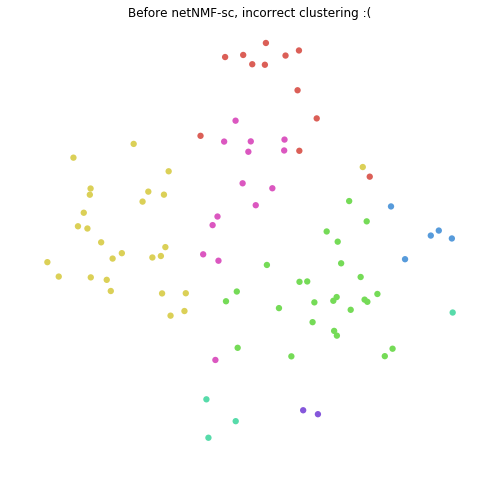

3 clusters with average silhouette score: 0.38943905


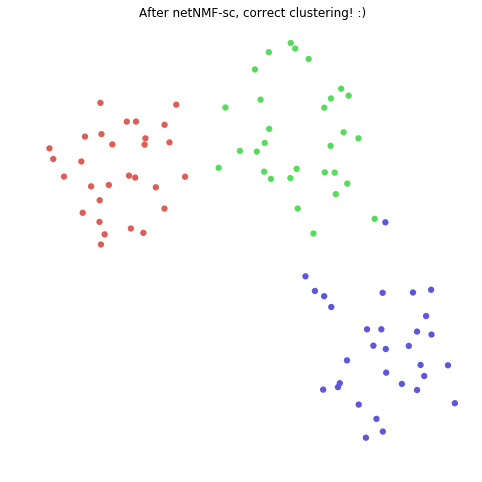

In [8]:
from netNMFsc import plot

from sklearn.decomposition import PCA
pca = PCA(n_components=dimensions)
pca.fit(X)
components = pca.components_
k,clusters = plot.select_clusters(components)
plot.tSNE(components,clusters)
plt.title('Before netNMF-sc, incorrect clustering :(')
plt.show()

# Select number of cluster from d-dimensional cell matrix, H and plot tSNE projection
k,clusters = plot.select_clusters(H)
plot.tSNE(H,clusters)
plt.title('After netNMF-sc, correct clustering! :)')
plt.show()


### Script for running netNMF-sc from the command line